<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #7: Clasificación de textos
`Fecha de entrega: Abril 22, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [41]:
import re
import json
import pandas as pd
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')

In [21]:
# Cargar datos
#path = 
data = pd.read_csv("D:/archivos salvar/Maestria Analistica Estrategica de Datos/II semestre/NLP/reviews_vidjew_es.csv")
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


### `[8 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [22]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=10)

print(f'Tenemos data.shape[0] datos en total')
print(f'El conjunto de datos de entrenamiento (train) tiene {train.shape[0]} datos')
print(f'El conjunto de datos de prueba (test) tiene {test.shape[0]} datos')

Tenemos data.shape[0] datos en total
El conjunto de datos de entrenamiento (train) tiene 800 datos
El conjunto de datos de prueba (test) tiene 200 datos


###  `[8 pts]` Punto 2: Hacer pre-procesamiento del texto

In [23]:
def pre_procesamiento(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+"," ", texto)
    texto = texto.split()
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    
    return texto
    


In [24]:
tfidf_vect = TfidfVectorizer(preprocessor = pre_procesamiento)
tfidf_vect

TfidfVectorizer(preprocessor=<function pre_procesamiento at 0x0000020F47B44B80>)

###  `[10 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, Árbol de Decisión, u otro.

In [25]:
X_train = tfidf_vect.fit_transform(train.review_body.values)
y_train = train.product_category.values

X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values

print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f'Tamaño de y_train {len(y_train)} y el tamaño de y_test {len(y_test)}')


Tamaño de X_train (entrenamiento): (800, 3222)
Tamaño de X_test (prueba): (200, 3222)
Tamaño de y_train 800 y el tamaño de y_test 200


In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [27]:
#inicializar los clasificadores

# no se colocan parametros entonces toma los default
nb = MultinomialNB()
logreg = LogisticRegression(class_weight='balanced')
svm = LinearSVC(class_weight='balanced')
dt = DecisionTreeClassifier(class_weight='balanced')

In [28]:
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train);

In [29]:
y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_dt = dt.predict(X_test)

###  `[10 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [30]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

In [31]:
print('Naive Bayes')
print(metrics.classification_report(y_pred_nb, y_test))
print('##################################################')
print('Regresion Logistica')
print(metrics.classification_report(y_pred_logreg, y_test))
print('##################################################')
print('SVM')
print(metrics.classification_report(y_pred_svm, y_test))
print('##################################################')
print('Arboles de decisión')
print(metrics.classification_report(y_pred_dt, y_test))

Naive Bayes
              precision    recall  f1-score   support

     jewelry       0.95      0.84      0.89       109
 video_games       0.83      0.95      0.89        91

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.90      0.89      0.89       200

##################################################
Regresion Logistica
              precision    recall  f1-score   support

     jewelry       0.84      0.84      0.84        97
 video_games       0.84      0.84      0.84       103

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

##################################################
SVM
              precision    recall  f1-score   support

     jewelry       0.90      0.85      0.87       102
 video_games       0.85      0.90      0.88        98

    accuracy                           0.88 

In [35]:
metricas = [precision_score, recall_score, f1_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f"Naive Bayes: {metrica(y_test, y_pred_nb, pos_label='jewelry'):.2f}")
    print(f"Regresión Logística: {metrica(y_test, y_pred_logreg, pos_label='jewelry'):.2f}")
    print(f"SVM: {metrica(y_test, y_pred_svm, pos_label='jewelry'):.2f}")
    print(f"Árbol de decisión: {metrica(y_test, y_pred_dt, pos_label='jewelry'):.2f}")
    print()

precision_score
Naive Bayes: 0.84
Regresión Logística: 0.84
SVM: 0.85
Árbol de decisión: 0.76

recall_score
Naive Bayes: 0.95
Regresión Logística: 0.84
SVM: 0.90
Árbol de decisión: 0.68

f1_score
Naive Bayes: 0.89
Regresión Logística: 0.84
SVM: 0.87
Árbol de decisión: 0.72



In [36]:
metricas = [precision_score, recall_score, f1_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f"Naive Bayes: {metrica(y_test, y_pred_nb, pos_label='video_games'):.2f}")
    print(f"Regresión Logística: {metrica(y_test, y_pred_logreg, pos_label='video_games'):.2f}")
    print(f"SVM: {metrica(y_test, y_pred_svm, pos_label='video_games'):.2f}")
    print(f"Árbol de decisión: {metrica(y_test, y_pred_dt, pos_label='video_games'):.2f}")
    print()

precision_score
Naive Bayes: 0.95
Regresión Logística: 0.84
SVM: 0.90
Árbol de decisión: 0.73

recall_score
Naive Bayes: 0.83
Regresión Logística: 0.84
SVM: 0.85
Árbol de decisión: 0.80

f1_score
Naive Bayes: 0.89
Regresión Logística: 0.84
SVM: 0.88
Árbol de decisión: 0.76



Exactitud: 0.86
precision_score: 0.86
recall_score: 0.86
f1_score: 0.86


###  `[BONUS: 3 pts]` Matriz de confusión

Text(0.5, 1.0, 'Regresión Logística')

<Figure size 1080x1080 with 0 Axes>

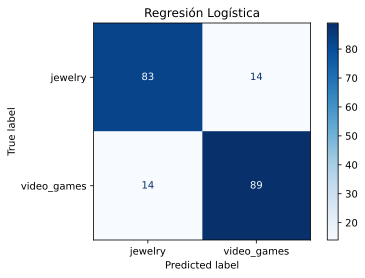

In [44]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred_nb,labels =["jewelry", "video_games"])
mat


array([[92,  5],
       [17, 86]], dtype=int64)

In [45]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred_logreg,labels =["jewelry", "video_games"])
mat

array([[81, 16],
       [16, 87]], dtype=int64)

In [46]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred_svm,labels =["jewelry", "video_games"])
mat

array([[87, 10],
       [15, 88]], dtype=int64)

In [47]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred_dt,labels =["jewelry", "video_games"])
mat

array([[66, 31],
       [21, 82]], dtype=int64)

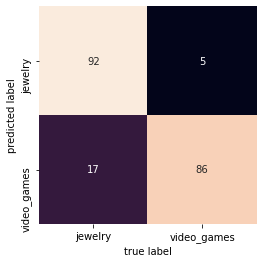

In [49]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_pred_nb, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=data['product_category'].unique(),
            yticklabels=data['product_category'].unique())
plt.xlabel('true label')
plt.ylabel('predicted label');

In [90]:
nuevos = ["toma el control de la tienda de joyas",'la consola proyecta las imagenes del evento de joyeria','Juegos o Conjunto de Pulseras','Aretes es el nuevo juego ', 'aretes y pulsera estan economicas', 'que cuesta el x box', 'por la compra de la pulsera lleve un juego', 'por la compra de la cadena lleve un video juego' ]
nuevos_trans = tfidf_vect.transform(nuevos)
dt.predict(nuevos_trans)

array(['jewelry', 'video_games', 'video_games', 'video_games', 'jewelry',
       'video_games', 'video_games', 'video_games'], dtype=object)

###  `[12 pts]` Punto 5: Términos más importantes de cada categoría

In [71]:
vocab = {value:key for key,value in tfidf_vect.vocabulary_.items()}
[(vocab[e[0]], round(e[1],2)) for e in zip(nb.coef_[0].argsort(), sorted(nb.coef_[0]))][-10:]

[('solo', -6.5),
 ('funciona', -6.44),
 ('precio', -6.4),
 ('mando', -6.33),
 ('buen', -6.32),
 ('si', -6.19),
 ('producto', -6.1),
 ('perfecto', -5.99),
 ('bien', -5.89),
 ('juego', -5.54)]

In [67]:
vocab = {value:key for key,value in tfidf_vect.vocabulary_.items()}
[(vocab[e[0]], round(e[1],2)) for e in zip(nb.coef_[0].argsort(), sorted(nb.coef_[0]))][:10]

[('suelo', -8.42),
 ('fenomenal', -8.42),
 ('fea', -8.42),
 ('favoritos', -8.42),
 ('favorecedores', -8.42),
 ('favorecedoras', -8.42),
 ('sortija', -8.42),
 ('fantástico', -8.42),
 ('fenómeno', -8.42),
 ('falsos', -8.42)]

In [65]:
vocab = {value:key for key,value in tfidf_vect.vocabulary_.items()}
[(vocab[e[0]], round(e[1],2)) for e in zip(logreg.coef_[0].argsort(), sorted(logreg.coef_[0]))][-10:]

[('juegos', 1.0),
 ('hijo', 1.04),
 ('consola', 1.17),
 ('perfecto', 1.18),
 ('jugar', 1.18),
 ('solo', 1.26),
 ('ps', 1.29),
 ('funciona', 1.39),
 ('mando', 1.93),
 ('juego', 3.61)]

In [66]:
vocab = {value:key for key,value in tfidf_vect.vocabulary_.items()}
[(vocab[e[0]], round(e[1],2)) for e in zip(svm.coef_[0].argsort(), sorted(svm.coef_[0]))][-10:]

[('ratón', 1.09),
 ('funciona', 1.11),
 ('sonido', 1.19),
 ('grupos', 1.21),
 ('botones', 1.22),
 ('consola', 1.23),
 ('solo', 1.27),
 ('ps', 1.37),
 ('mando', 1.79),
 ('juego', 2.8)]

In [79]:
import graphviz 


SyntaxError: invalid syntax (<ipython-input-79-f1eef71a1d7c>, line 2)

In [80]:
import graphviz 
from sklearn.tree import export_graphviz

viz = export_graphviz(dt, 
                      out_file=None, # ¿Salvar en el computador?
                      max_depth=5, # Máxima profundidad
                      feature_names=list(dict(sorted(tfidf_vect.vocabulary_.items())).keys()), # Palabras
                      class_names = ['Jewelry', 'video_game'],
                      rounded=True, filled=True
                     )

graph = graphviz.Source(viz)
graph


ModuleNotFoundError: No module named 'graphviz'

### `[2 pts]` Punto 6: Pregunta

- ¿Qué interpretación y/o conclusiones saca de su modelo?

La clasificación de las categorias toma como preferencia la palabra con mayor peso en caso de enfretarse en frases ambiguas, como en el caso de "Juego o conjunto de Pulseras", dentro de la bolsa de palabras "Juego" tiene mayor importancia que "Pulsera"

con los ejemplos realizados puedo deducir que las palabras que se concentran en la categoria de video-games presentan mayor frecuencia y con una gama de palabras mas reducidas, en compración con la categoria jelwery que manejen mayor diversificación de palabras por lo que presentan menor frecuencia aun cuando Jelwery tiene mas observaciones pero no lo suficiente para hablar de desbalance. 

In [91]:
data['product_category'].value_counts()

jewelry        502
video_games    498
Name: product_category, dtype: int64